<a href="https://colab.research.google.com/github/TheTharz/CNN-demo--workshop/blob/main/CNNDemo_Student_Version.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# CNN Implementation with PyTorch

Dataset: CIFAR10 (Ref: https://www.cs.toronto.edu/~kriz/cifar.html)
Info: <br>
> Number of Images: 60000,  32 * 32 in resolution
> Number of Classes: 10 (Airplane, Automobile, Bird, Cat, Deer, Dog, Frog, Horse, Ship, Truck)

**Prerequisites**
> PyTorch Basics: https://youtu.be/OIenNRt2bjg
> Python Basics: https://youtu.be/rfscVS0vtbw

**References:**
1. https://pytorch.org/tutorials/beginner/blitz/cifar10_tutorial.html
2. https://wandb.ai/authors/ayusht/reports/Implementing-Dropout-Regularization-in-PyTorch--VmlldzoxNTgwOTE
3. https://medium.com/artificialis/dropout-regularization-using-pytorch-in-python-7765337cb158
3. https://pytorch.org/vision/stable/auto_examples/transforms/plot_transforms_illustrations.html#sphx-glr-auto-examples-transforms-plot-transforms-illustrations-py
4. https://pytorch.org/vision/main/datasets.html
5. https://pytorch.org/tutorials/beginner/basics/data_tutorial.html
6. https://pytorch.org/tutorials/beginner/basics/tensorqs_tutorial.html#:~:text=Tensors%20are%20a%20specialized%20data,GPUs%20or%20other%20hardware%20accelerators.

## Load Google Drive

In [1]:
# Load Google drive to Colab


## Load the Necessary Libraries

In [2]:
import torch
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import numpy as np
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torchsummary import summary

## Define transforms (Data Augmentation)

In [3]:
# prompt: # Define transforms
# # For training set
# # For testing set

# Define transforms (Data Augmentation)
transform_train = transforms.Compose([
    transforms.RandomHorizontalFlip(),  # Randomly flip the image horizontally
    transforms.RandomRotation(10),  # Randomly rotate the image within 10 degrees
    transforms.ToTensor(),  # Convert the image to a PyTorch tensor
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))  # Normalize the image with mean and standard deviation
])

transform_test = transforms.Compose([
    transforms.ToTensor(),  # Convert the image to a PyTorch tensor
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))  # Normalize the image with mean and standard deviation
])


**Tensors**
> - Tensors are a specialized data structure that are very similar to arrays and matrices. In PyTorch, we use tensors to encode the inputs and outputs of a model, as well as the model’s parameters.
> - Tensors are similar to NumPy’s ndarrays, except that tensors can run on GPUs or other hardware accelerators. In fact, tensors and NumPy arrays can often share the same underlying memory, eliminating the need to copy data.
> - Tensors are also optimized for automatic differentiation.


# Load datasets and define the

Torchvision provides many built-in datasets in the torchvision.datasets module, as well as utility classes for building your own datasets (https://pytorch.org/vision/main/datasets.html).

> PyTorch provides two data primitives: torch.utils.data.DataLoader and torch.utils.data.Dataset that allow you to use pre-loaded datasets as well as your own data. Dataset stores the samples and their corresponding labels, and DataLoader wraps an iterable around the Dataset to enable easy access to the samples.

In [4]:
# prompt: # Load datasets

# Load datasets
train_data = torchvision.datasets.CIFAR10(root='./data', train=True, download=True, transform=transform_train)
test_data = torchvision.datasets.CIFAR10(root='./data', train=False, download=True, transform=transform_test)


100%|██████████| 170498071/170498071 [00:04<00:00, 41253368.07it/s]


Extracting ./data/cifar-10-python.tar.gz to ./data
Files already downloaded and verified


In [5]:
# prompt: #Define batchsize
# #create data loaders

batch_size = 25

# Create data loaders
train_loader = torch.utils.data.DataLoader(train_data, batch_size=batch_size, shuffle=True)
test_loader = torch.utils.data.DataLoader(test_data, batch_size=batch_size, shuffle=False)


**Try!**
Here we have used only two sets are training and the testing tests. However, for the hyperparameter tuning we need the validation set as well. Therefore, find out a solution to split the test set into two and, redo the dataset loading and dataloader preparation.

In [6]:
# Define the classes in the dataset

classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')


## Display a Sample of Images

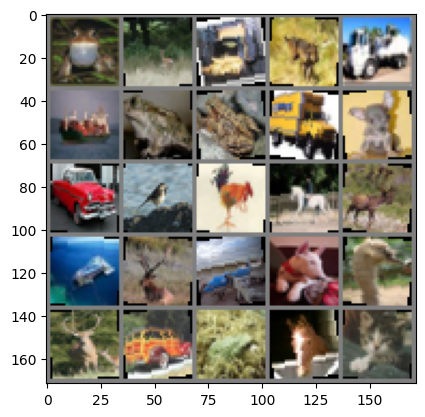

In [7]:
# Visualize a batch of images

def imshow(img):
    img = img / 2 + 0.5;  # Unnormalized
    # Convert image into a Numpy Array for data manipuation and usage in
    # matplotlib
    npimg = img.numpy()
    # In numpy images defined as no. of channels, height, width format
    # However, matplotlib expects in height, width, channels format
    # So, we need to transform the npimg.
    plt.imshow(npimg.transpose((1, 2, 0)))
    plt.show()

dataiter = iter(train_loader)
images,labels = next(dataiter)

imshow(torchvision.utils.make_grid(images,nrow=5))


## Define CNN

In [13]:
# Define the CNN model
class CNN(nn.Module):
  def __init__(self):
    super(CNN,self).__init__()
    self.conv1 = nn.Conv2d(3,6,5,1,0)
    self.bn1 = nn.BatchNorm2d(6)
    self.pool = nn.MaxPool2d(2,2)
    self.conv2 = nn.Conv2d(6,16,3)
    self.bn2 = nn.BatchNorm2d(16)
    self.dropout = nn.Dropout(0.2)
    self.fc1 = nn.Linear(16*6*6,144)
    self.bn3 = nn.BatchNorm1d(144)
    self.fc2 = nn.Linear(144,72)
    self.fc3 = nn.Linear(72,10)

  def forward(self, x):
    x = self.pool(F.relu(self.bn1(self.conv1(x))))
    x = self.pool(F.relu(self.bn2(self.conv2(x))))
    x = torch.flatten(x,1) #flatten all dimesions except batch
    x = F.relu(self.bn3(self.fc1(x)))
    x = self.dropout(x)
    x = F.relu(self.fc2(x))
    return self.fc3(x)





In [14]:
# Initialize a instance of the model
model = CNN()



## Define the Device

In [15]:
# If cuda GPU is available, it will be set as the device otherwise cpu
device = "cuda" if torch.cuda.is_available() else "cpu"
print(device)

cuda


In [18]:
# Transfer model to the device

model.to(device)

CNN(
  (conv1): Conv2d(3, 6, kernel_size=(5, 5), stride=(1, 1))
  (bn1): BatchNorm2d(6, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv2): Conv2d(6, 16, kernel_size=(3, 3), stride=(1, 1))
  (bn2): BatchNorm2d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (dropout): Dropout(p=0.2, inplace=False)
  (fc1): Linear(in_features=576, out_features=144, bias=True)
  (bn3): BatchNorm1d(144, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (fc2): Linear(in_features=144, out_features=72, bias=True)
  (fc3): Linear(in_features=72, out_features=10, bias=True)
)

In [19]:
# Generate model summary

summary(model,(3,32,32))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1            [-1, 6, 28, 28]             456
       BatchNorm2d-2            [-1, 6, 28, 28]              12
         MaxPool2d-3            [-1, 6, 14, 14]               0
            Conv2d-4           [-1, 16, 12, 12]             880
       BatchNorm2d-5           [-1, 16, 12, 12]              32
         MaxPool2d-6             [-1, 16, 6, 6]               0
            Linear-7                  [-1, 144]          83,088
       BatchNorm1d-8                  [-1, 144]             288
           Dropout-9                  [-1, 144]               0
           Linear-10                   [-1, 72]          10,440
           Linear-11                   [-1, 10]             730
Total params: 95,926
Trainable params: 95,926
Non-trainable params: 0
----------------------------------------------------------------
Input size (MB): 0.01
Forward/ba

## Define the Loss Function and Optimizer

In [20]:
# Define loss function and the optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(),lr=0.0001)


## Train the model

In [22]:
# Train the defined model
for epoch in range(25):
  running_loss = 0.0
  for i,data in enumerate(train_loader):
    inputs,labels = data[0].to(device), data[1].to(device)
    optimizer.zero_grad()
    output = model(inputs)
    loss = criterion(output,labels)
    loss.backward()
    optimizer.step()

    running_loss += loss.item()
    if i % 2000 == 1999:
      print(f"[{epoch+1},(i+1: 5d)] loss: {running_loss/2000:.3f}")
      running_loss = 0.0

print("training has being completed")

[1,(i+1: 5d)] loss: 1.732
[2,(i+1: 5d)] loss: 1.448
[3,(i+1: 5d)] loss: 1.365
[4,(i+1: 5d)] loss: 1.308
[5,(i+1: 5d)] loss: 1.267
[6,(i+1: 5d)] loss: 1.234
[7,(i+1: 5d)] loss: 1.207
[8,(i+1: 5d)] loss: 1.189
[9,(i+1: 5d)] loss: 1.172
[10,(i+1: 5d)] loss: 1.147
[11,(i+1: 5d)] loss: 1.137
[12,(i+1: 5d)] loss: 1.121
[13,(i+1: 5d)] loss: 1.114
[14,(i+1: 5d)] loss: 1.099
[15,(i+1: 5d)] loss: 1.094
[16,(i+1: 5d)] loss: 1.078
[17,(i+1: 5d)] loss: 1.070
[18,(i+1: 5d)] loss: 1.061
[19,(i+1: 5d)] loss: 1.051
[20,(i+1: 5d)] loss: 1.046
[21,(i+1: 5d)] loss: 1.036
[22,(i+1: 5d)] loss: 1.032
[23,(i+1: 5d)] loss: 1.027
[24,(i+1: 5d)] loss: 1.015
[25,(i+1: 5d)] loss: 1.010
training has being completed


` optimizer.zero_grad()` :
used in machine learning frameworks like PyTorch to reset the gradients of all model parameters to zero. It's an essential step before computing the gradients for a new batch of data during the training process. This helps prevent gradient accumulation from previous iterations that could affect the current iteration's calculations.

## Model Saving and Loading

In [23]:
# Saving
#PATH = '/content/drive/MyDrive/AI/Model_Weights/cifar_net_Demo.pth'
#torch.save(model.save(PATH))


AttributeError: 'CNN' object has no attribute 'save'

In [ ]:
# Loading



In [ ]:
# Once more send the model to the device after loading



## Performance with Testset

In [24]:
# Measure performance of the test set
correct = 0
total = 0

with torch.no_grad():
  for data in test_loader:
    images,labels = data[0].to(device), data[1].to(device)

    outputs = model(images)

    _,predicted = torch.max(outputs.data,1)
    total += labels.size(0)
    correct += (predicted == labels).sum().item()

  print(f"Accuracy of the network on 10000 test :  {100*correct//total}%")


Accuracy of the network on 10000 test :  62%


**Try!**
In the above cases, we did not utilized any validation set and no hyperparameter tuning has been performed either. So model performance should be able to improve by performing some hyperparameter tuning.

**Try!**
Furthermore, try to measure the training and validation set losses/accuracies within the training loop and plot them in a single plot. In this way, we will be able to identify whether model is overfitting or not. In the above case, neither training or validation losses/accuracies were calculated. Try to record the performance once per certain number of batches.

**Try!**
Try to integrate early stopping into the training loop when the model performance w.r.t the validation set is no longer improving with further training. Try to think of a possible logic and add that into the training loop accordingly.

## Performance for Different Classes

In [28]:
# Measure the performance w.r.t each class
correct_pred = {classname: 0 for classname in classes}
total_pred = {classname:0 for classname in classes}

with torch.no_grad():
  for data in test_loader:
    images,labels = data[0].to(device), data[1].to(device)

    outputs = model(images)

    _,predicted = torch.max(outputs,1)

    for label,prediction in zip(labels,predicted):
      if label == prediction:
        correct_pred[classes[label]] +=1
      total_pred[classes[label]] += 1

  for classname,correct_count in correct_pred.items():
    accuracy = 100 * correct_count / total_pred[classname]
    print(f"Accuracy for class {classname}: {accuracy}%")



Accuracy for class plane: 67.9%
Accuracy for class car: 78.9%
Accuracy for class bird: 49.5%
Accuracy for class cat: 41.3%
Accuracy for class deer: 50.9%
Accuracy for class dog: 50.3%
Accuracy for class frog: 78.9%
Accuracy for class horse: 74.5%
Accuracy for class ship: 72.4%
Accuracy for class truck: 72.4%
